# Time the performance of a Python Object

In [1]:
import timeit

import numpy as np

from timeit import Timer

## Time list filling

In [2]:
#concat
def test1():
    l = []
    for i in range(10000):
        l = l + [i]

#append
def test2():
    l = []
    #Add a new element with append
    for i in range(10000):
        l.append(i)

#comprehension
def test3():
    #Use bracket that contains elements
    l = [i for i in range(10000)]
    
#list range
def test4():
    #Use list method
    l = list(range(10000))
    
expSize = 100
        

In [3]:
t1 = Timer("test1()", "from __main__ import test1")
st1 = t1.timeit(number=expSize)
print("concat ",st1, "milliseconds")
t2 = Timer("test2()", "from __main__ import test2")
print("append ",t2.timeit(number=expSize), "milliseconds")
t3 = Timer("test3()", "from __main__ import test3")
print("comprehension ",t3.timeit(number=expSize), "milliseconds")
t4 = Timer("test4()", "from __main__ import test4")
st4 = t4.timeit(number=expSize)
print("list range ",st4, "milliseconds")

print ('\n Worse vs. best ratio', st1/st4, '\n')

concat  25.208993583999998 milliseconds
append  0.13781585199999924 milliseconds
comprehension  0.08480268199999941 milliseconds
list range  0.024738168999999033 milliseconds

 Worse vs. best ratio 1019.0323133454616 



Text(0.5, 1.0, 'Time of Methods')

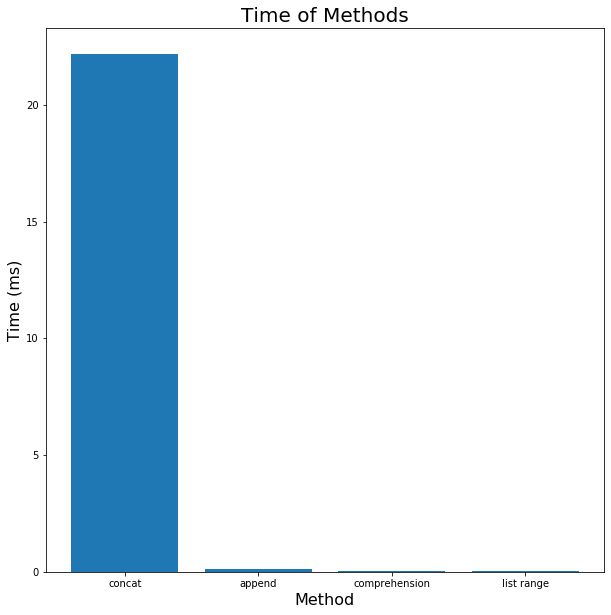

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

time = [22.19,0.11,0.05,0.023]
method = ['concat', 'append', 'comprehension', 'list range']

ax.bar(method, time)

ax.set_xlabel('Method',fontsize=16)
ax.set_ylabel('Time (ms)', fontsize=16)
ax.set_title('Time of Methods', fontsize = 20)

## Pop-front vs. pop-end

In [5]:
#Pop the first element of a list
pop_zero = Timer("x.pop(0)",
                'from __main__ import x')

#Pop the last element of a list
pop_end = Timer('x.pop()',
                'from __main__ import x')

#Number of experiments
expSize = 100

#Define the array
x = list(range(2000000))

#Time the average results of 100 experiments
t_zero = pop_zero.timeit(number=expSize)
t_end=pop_end.timeit(number=expSize)

#Find the ratio between 2 methods
print("Popping the first element takes {} milliseconds".format(t_zero))
print("Popping the last element takes {} milliseconds".format(t_end))
print("The ratio between 2 methods is {}".format(t_zero/t_end))



Popping the first element takes 0.24867004100000045 milliseconds
Popping the last element takes 1.2170000001532344e-05 milliseconds
The ratio between 2 methods is 20433.035412382087


In [6]:
#Pop the first element of a list
pop_zero = Timer("x.pop(0)",
                'from __main__ import x')

#Pop the last element of a list
pop_end = Timer('x.pop()',
                'from __main__ import x')

#Number of experiments
expSize = 100
result = []

for i in range(10000,1000001,20000):
    
    #Define the array
    x = list(range(i))
    
    #Time the average results of 1000 experiments for each method
    pt = pop_end.timeit(number=expSize)
    pz = pop_zero.timeit(number=expSize)
    
    result.append((i,pz,pt))

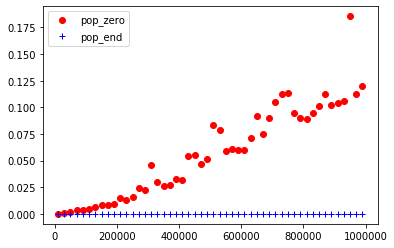

In [7]:
import numpy as np
matrixDat = np.array( result )
import matplotlib.pyplot as plt
plt.plot(matrixDat[:,0], matrixDat[:,1], 'o', color='red',label='pop_zero');
plt.plot(matrixDat[:,0], matrixDat[:,2], '+', color='blue',label='pop_end');
leg = plt.legend(numpoints=1)


## Comparing List and Set

In [8]:
import random
result = []

expSize = 100

for i in range(10000,1000001,20000):

    t = timeit.Timer('random.randrange(%d) in x' % i,
                'from __main__ import random, x')

    #Define list
    x = list(range(i))

    #time of list
    lt = t.timeit(number = expSize)

    #Define dict
    x = {j: None for j in range(i)}

    #time of dcit
    dt = t.timeit(number = expSize)

    result.append((i, lt, dt))




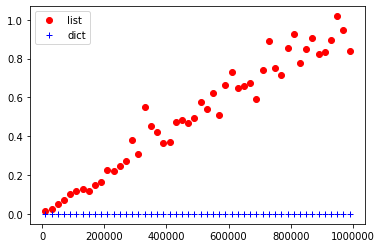

In [9]:
import numpy as np
import matplotlib.pyplot as plt

matrixDat = np.array( result )
plt.plot(matrixDat[:,0], matrixDat[:,1], 'o', color='red',label='list');
plt.plot(matrixDat[:,0], matrixDat[:,2], '+', color='blue',label='dict');

leg = plt.legend(numpoints=1)